# Diabetes Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data file

In [2]:
data=pd.read_csv("D:\Anaconda\diabetes.csv")

## Checking is there any missing value in each column

In [3]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Object creation for testing models 

In [5]:
test_data=[5,121,72,23,112,26.2,0.245,30]
test_data_np=np.array(test_data)
test_data_np

array([  5.   , 121.   ,  72.   ,  23.   , 112.   ,  26.2  ,   0.245,
        30.   ])

In [6]:
test_data_rs=test_data_np.reshape(1,-1)

## Accessing rows & columns

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.iloc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [9]:
data['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [10]:
data.iloc[1,2]

66

In [11]:
data.shape

(768, 9)

## Checking datatypes of all the columns

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Statistics for each column

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Imbalance

In [14]:
#supervised
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Visualisation

<AxesSubplot:xlabel='Outcome', ylabel='count'>

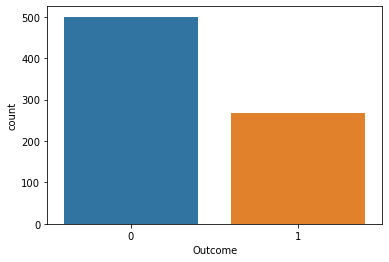

In [16]:
sns.countplot(x="Outcome",data=data)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

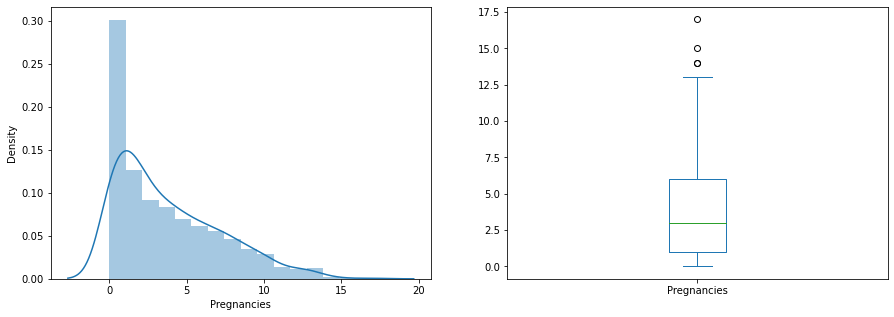

In [17]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Pregnancies'])
plt.subplot(122)
data['Pregnancies'].plot.box(figsize=(15,5))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

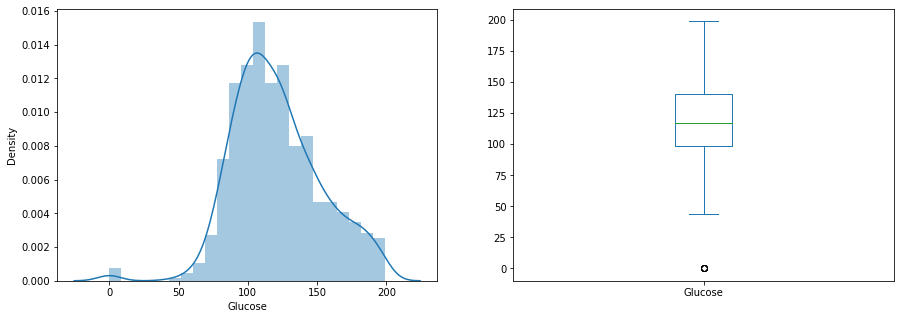

In [18]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Glucose'])
plt.subplot(122)
data['Glucose'].plot.box(figsize=(15,5))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

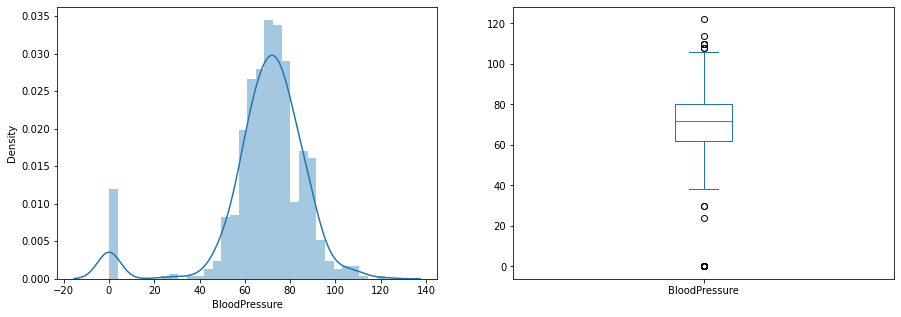

In [19]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['BloodPressure'])
plt.subplot(122)
data['BloodPressure'].plot.box(figsize=(15,5))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

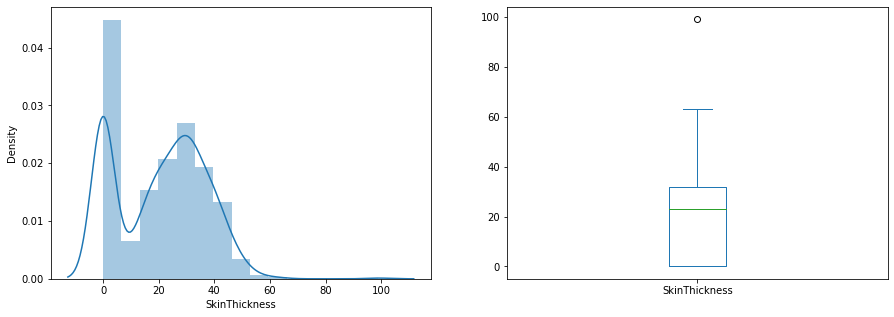

In [20]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['SkinThickness'])
plt.subplot(122)
data['SkinThickness'].plot.box(figsize=(15,5))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

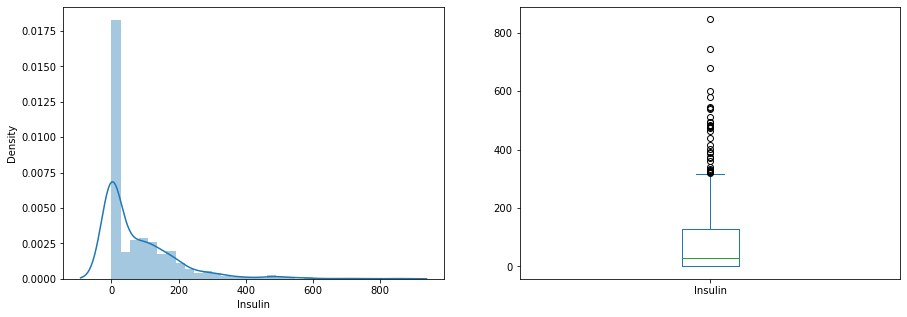

In [21]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Insulin'])
plt.subplot(122)
data['Insulin'].plot.box(figsize=(15,5))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

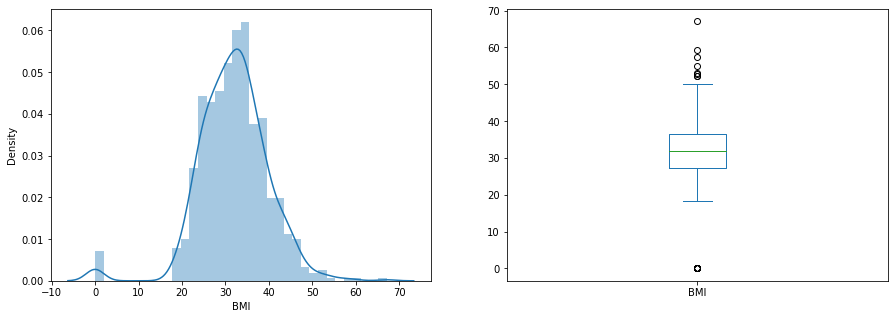

In [22]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['BMI'])
plt.subplot(122)
data['BMI'].plot.box(figsize=(15,5))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

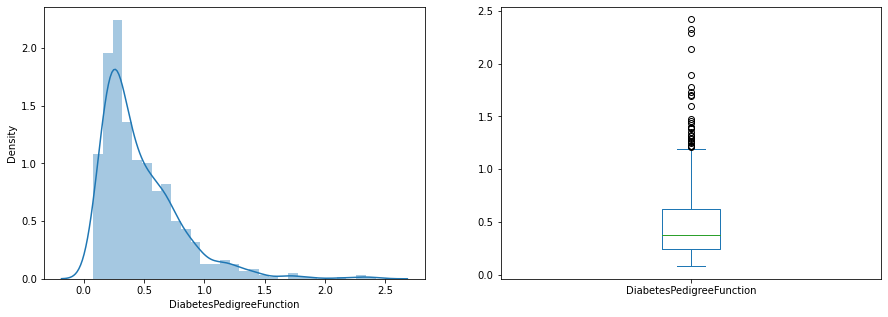

In [23]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['DiabetesPedigreeFunction'])
plt.subplot(122)
data['DiabetesPedigreeFunction'].plot.box(figsize=(15,5))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

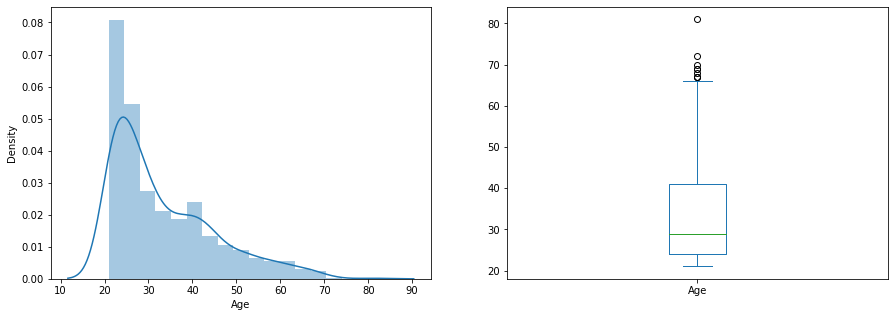

In [24]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Age'])
plt.subplot(122)
data['Age'].plot.box(figsize=(15,5))

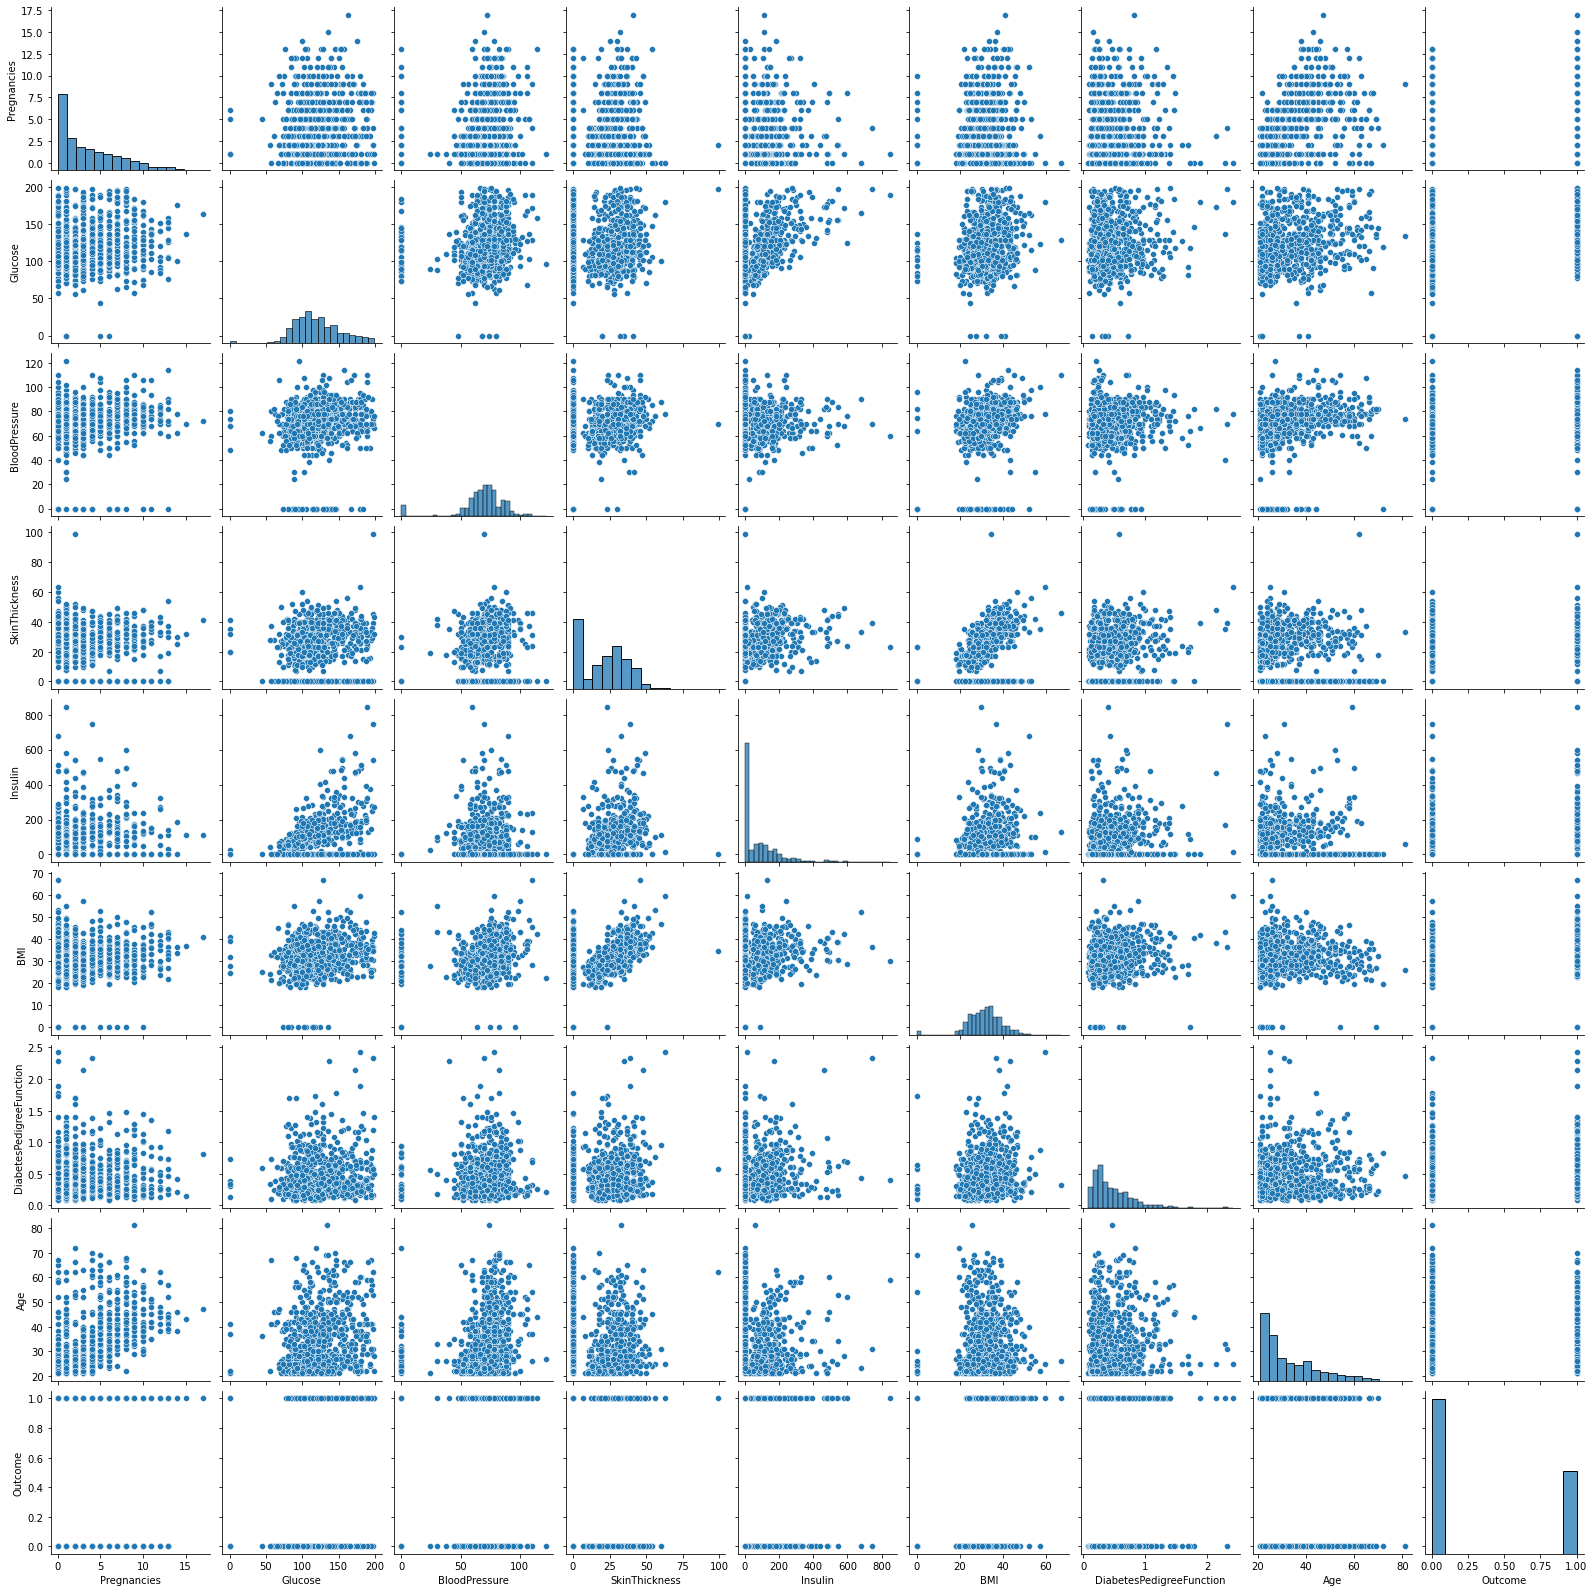

In [25]:
sns.pairplot(data,palette="Blues")

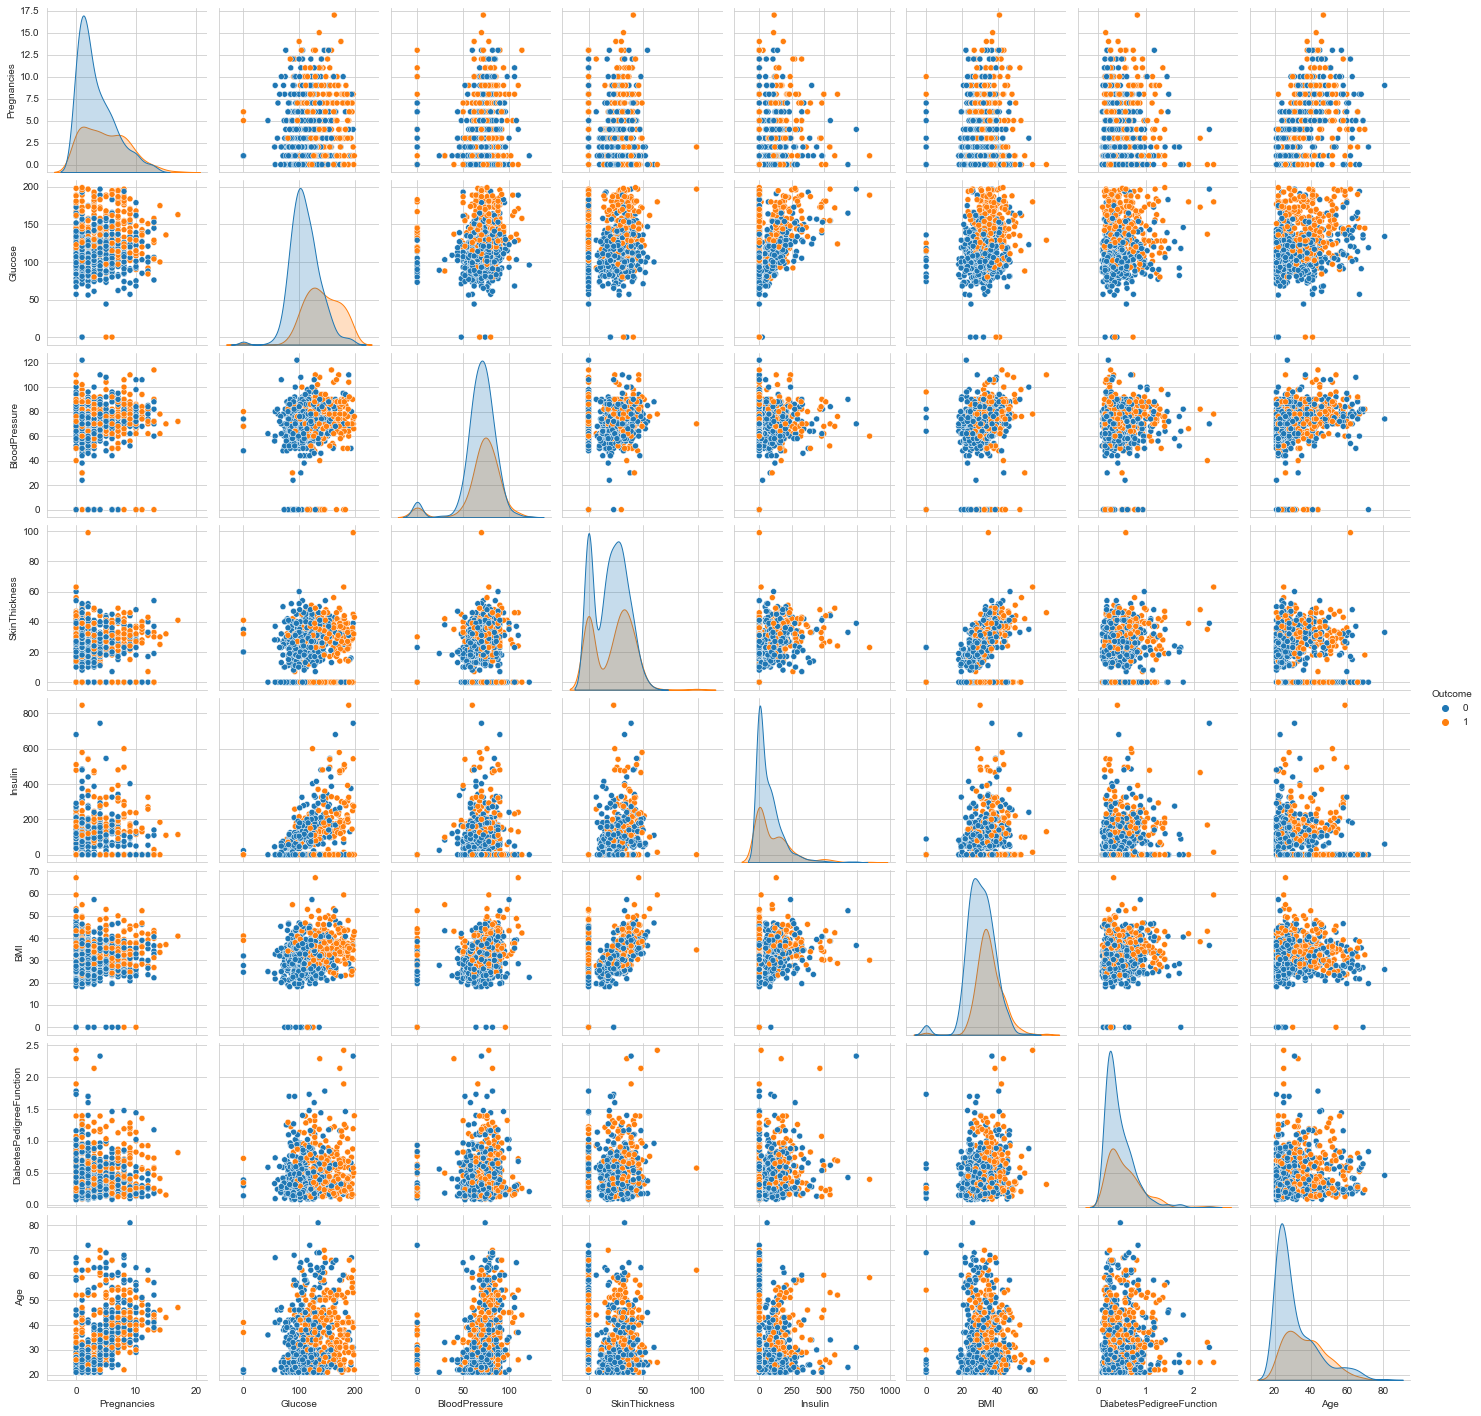

In [26]:
sns.set_style('whitegrid')
sns.pairplot(data,hue='Outcome')

In [27]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


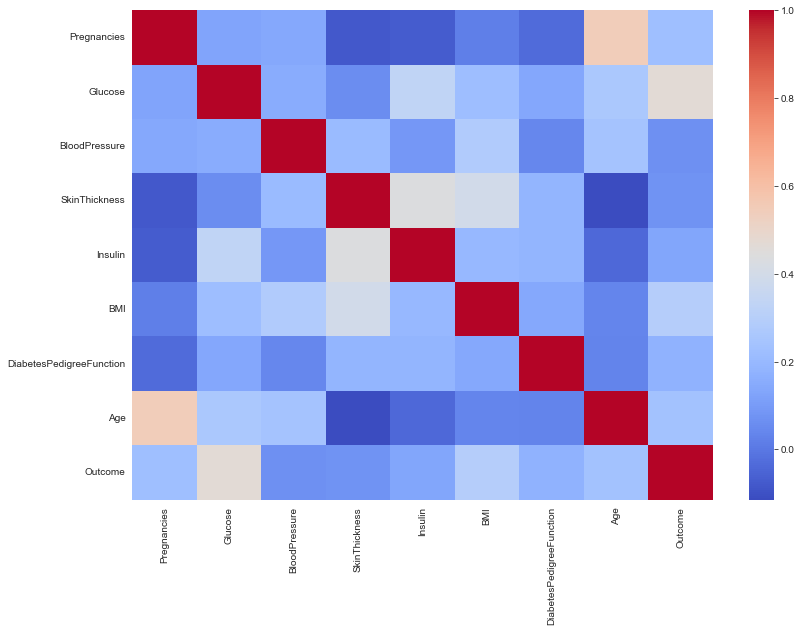

In [28]:
corr_matrix=data.corr()
ax=plt.subplots(figsize=(13,9))
sns.heatmap(corr_matrix,cmap="coolwarm")
sns.set_context('paper',font_scale=2)

## Splitting data into test & train

In [29]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [30]:
X=data.drop(columns='Outcome',axis=1)
Y=data['Outcome']

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=123)


In [32]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
236,7,181,84,21,192,35.9,0.586,51
395,2,127,58,24,275,27.7,1.600,25
36,11,138,76,0,0,33.2,0.420,35
210,2,81,60,22,0,27.7,0.290,25
483,0,84,82,31,125,38.2,0.233,23
...,...,...,...,...,...,...,...,...
650,1,91,54,25,100,25.2,0.234,23
579,2,197,70,99,0,34.7,0.575,62
119,4,99,76,15,51,23.2,0.223,21
593,2,82,52,22,115,28.5,1.699,25


In [33]:
Y_test

236    1
395    0
36     0
210    0
483    0
      ..
650    0
579    1
119    0
593    0
310    0
Name: Outcome, Length: 154, dtype: int64

# Applying ML Algorithms

## [1] Logistic Regression (Binary Classification)

In [34]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

In [35]:
logreg.fit(X_train,Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
logreg_predict=logreg.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression: ")
accuracy_score(Y_test,logreg_predict)

Accuracy Score of Logistic Regression: 


0.7922077922077922

Confusion Matrix of Logistic Regression: 
 [[87  9]
 [23 35]]


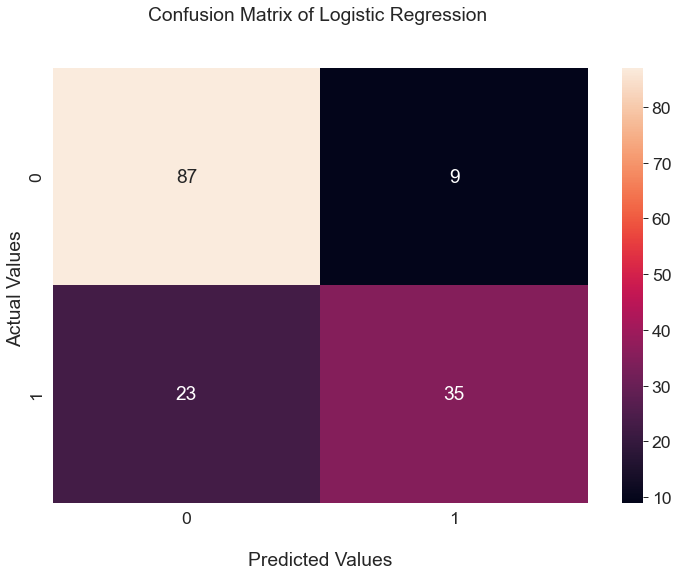

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix of Logistic Regression: \n",confusion_matrix(Y_test,logreg_predict))
plt.figure(figsize=(12,8))
heat1=sns.heatmap(confusion_matrix(Y_test,logreg_predict),annot=True)

heat1.set_title('Confusion Matrix of Logistic Regression \n\n');
heat1.set_xlabel('\nPredicted Values')
heat1.set_ylabel('Actual Values ')
plt.show()

In [39]:
print("\n\n Classification Report of Logistic Regression : \n\n\n\n",classification_report(Y_test,logreg_predict))



 Classification Report of Logistic Regression : 



               precision    recall  f1-score   support

           0       0.79      0.91      0.84        96
           1       0.80      0.60      0.69        58

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.79      0.79      0.79       154



In [40]:
# Real Testing of Logistic Regression
test_predict1=logreg.predict(test_data_rs)
test_predict1

array([0], dtype=int64)

## [2] Support Vector Machine 

In [41]:
from sklearn import svm

svm_model=svm.SVC(kernel='linear')

In [42]:
svm_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [43]:
svm_model_predict=svm_model.predict(X_test)

In [44]:
print("Accuracy Score of SVM: \n")
accuracy_score(Y_test,svm_model_predict)

Accuracy Score of SVM: 



0.8116883116883117

In [ ]:
print("Confusion Matrix of SVM : \n",confusion_matrix(Y_test,svm_model_predict))

plt.figure(figsize=(12,8))
heat2=sns.heatmap(confusion_matrix(Y_test,svm_model_predict),annot=True)

heat2.set_title('Confusion Matrix of SVM \n\n');
heat2.set_xlabel('\nPredicted Values')
heat2.set_ylabel('Actual Values ')
plt.show()

In [ ]:
print("\n\n Classification Report of SVM :\n\n\n\n",classification_report(Y_test,svm_model_predict))

In [ ]:
# Real Testing of Logistic Regression
test_predict2=svm_model.predict(test_data_rs)
test_predict2

## [3] Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model=RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_model.fit(X_train,Y_train)

In [ ]:
rfc_predict=rfc_model.predict(X_test)

In [ ]:
print("Accuracy Score of Random Forest: \n")
accuracy_score(Y_test,rfc_predict)

In [ ]:
print("Confusion Matrix of Random Forest : \n",confusion_matrix(Y_test,rfc_predict))

plt.figure(figsize=(12,8))
heat3=sns.heatmap(confusion_matrix(Y_test,rfc_predict),annot=True)

heat3.set_title('Confusion Matrix of Random forest \n\n ');
heat3.set_xlabel('\nPredicted Values ')
heat3.set_ylabel('Actual Values ')
plt.show()

In [ ]:
print("\n\n Classification Report of Random Forest :\n\n\n\n",classification_report(Y_test,rfc_predict))

### Variables that Impact the most using Random Forest

In [ ]:
rfc_model.feature_importances_

In [ ]:
pd.Series(rfc_model.feature_importances_,index=X.columns).plot(kind="barh")

In [ ]:
# Real Testing of Random Forest Classifier
test_predict3=rfc_model.predict(test_data_rs)
test_predict3

## [4] Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree_model=DecisionTreeClassifier()

In [ ]:
dec_tree_model.fit(X_train,Y_train)

In [ ]:
dec_tree_predict=dec_tree_model.predict(X_test)

In [ ]:
print("Accuracy Score of Decision Tree: \n")
accuracy_score(Y_test,dec_tree_predict)

In [ ]:
print("Confusion Matrix of Decision Tree : \n",confusion_matrix(Y_test,dec_tree_predict))

plt.figure(figsize=(12,8))
heat4=sns.heatmap(confusion_matrix(Y_test,dec_tree_predict),annot=True)

heat4.set_title('Confusion Matrix of Decision Tree \n\n ');
heat4.set_xlabel('\nPredicted Values ')
heat4.set_ylabel('Actual Values ')
plt.show()

In [ ]:
print("\n\n Classification Report of Decision Tree :\n\n\n\n",classification_report(Y_test,dec_tree_predict))

In [ ]:
dec_tree_model.feature_importances_

In [ ]:
pd.Series(dec_tree_model.feature_importances_,index=X.columns).plot(kind="barh")

In [ ]:
# Real Testing of Decision Tree
test_predict4=dec_tree_model.predict(test_data_rs)
test_predict4

## [5]  XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg_model=XGBClassifier()

In [ ]:
xg_model.fit(X_train,Y_train)

In [ ]:
xg_predict=xg_model.predict(X_test)

In [ ]:
print("Accuracy Score of XGBoost: \n")
accuracy_score(Y_test,xg_predict)

In [ ]:
print("Confusion Matrix of XGBoost : \n",confusion_matrix(Y_test,xg_predict))

plt.figure(figsize=(12,8))
heat5=sns.heatmap(confusion_matrix(Y_test,xg_predict),annot=True)

heat5.set_title('Confusion Matrix of XGBoost \n\n ');
heat5.set_xlabel('\nPredicted Values ')
heat5.set_ylabel('Actual Values ')
plt.show()

In [ ]:
print("\n\n Classification Report of XGBoost :\n\n\n\n",classification_report(Y_test,xg_predict))

In [ ]:
xg_model.feature_importances_

In [ ]:
pd.Series(xg_model.feature_importances_,index=X.columns).plot(kind="barh")

In [ ]:
# Real Testing of XGBoost
test_predict5=dec_tree_model.predict(test_data_rs)
test_predict5